# titanic data分析

## 问题  
1.titanic上的乘客有什么特点  
    平均年龄多少  
    男女比例多少  
    头等舱、二等舱、三等舱的比例多少  
2.titanic上生存下来的人有什么特点  
    生存下来的人和性别、年龄、登录港口是否有关

## 读取titanic-data.csv文件，并观察数据

In [7]:
import pandas as pd
titanic_data=pd.read_csv('titanic-data.csv')
titanic_data.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

### Description:  
PassengerId: passenger id  
Surviced: 1:survived, 0: not survive  
Pclass: ticket class, 1 = 1st, 2 = 2nd, 3 = 3rd  
Name:姓名  
Sex:性别  
Age:年龄  
SlibSp: 在船上的兄弟姐妹配偶数  
Parch: 在船上的父母子女数  
Ticket: ticket number  
Fare: ticket价格  
Cabin:客舱号码  
embarked:登船港口, C = Cherbourg, Q = Queenstown, S = Southampton	

In [4]:
#使用head可以观察下每列的数据，但对于各列是否有缺失数据，单纯从head无法获得全面的信息  
#可以使用isnull或者info

In [9]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
#DataFrame.info函数既可以获得每列的数据类型，又可以获取是否有缺失数据，所以这里不再使用titanic_data.dtypes

## 数据清洗  
可以看到在Age, Cabin和Embarked列都有NaN数据  
* Age为NaN的有177行，占比20%, 将其填充为其他值，会影响对Age列的分析，所以舍弃Age为NaN的行  
* Cabin为NaN的有687行，占比77%，舍弃Cabin为NaN的行会影响数据量，为计算过程中不产生错误，将Cabin NaN行填充字符串"null".  
* Embarked为NaN的行有2行，直接舍弃

In [12]:
#使用dropna舍弃Age,Embarked为NaN的行
titanic_data.dropna(axis=0,how='any',subset=['Age','Embarked'],inplace=True)

In [13]:
#使用fillna填充Cabin为NaN的行
titanic_data['Cabin'].fillna(value='null',axis=0,inplace=True)

In [15]:
#数据清理后再次使用info或者isnull确认下是否有遗漏
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Cabin          712 non-null object
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [22]:
#DataFrame的describe函数可以对所有数值型的数据进行统计计算，使用方便，无需再自定义函数
#def describe(df,col):
#    '''Input: df is pandas.DataFrame object, col is a column of df
#       Output: description of the col'''
#    s=df[col]
#    max_value=s.max()
#    min_value=s.min()
#    mean_value=s.mean()
#    std=s.std()
#    plt.xlabel(col)
#    plt.ylabel("Number")
#    plt.title("Data Distribution Curve")
#    plt.hist(s)
#    print "max value is ",max_value
#    print "min_value is ",min_value
#    print "average value is ",mean_value
#    print "standard error is ",std

统计titanic上乘客的年龄特点

In [23]:
titanic_data.describe()['Age']

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Age_group
(0, 10]      64
(10, 20]    115
(20, 30]    230
(30, 40]    154
(40, 50]     86
(50, 60]     42
(60, 70]     16
(70, 80]      5
(80, 90]      0
Name: Age_group, dtype: int64


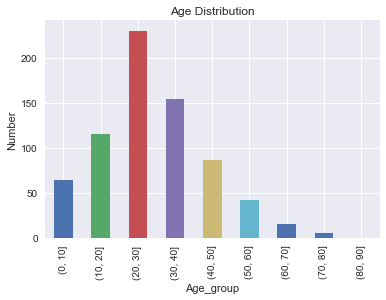

In [105]:
#统计各个年龄段的人数，10岁为一段，如0-10, 10-20等
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
#添加一列Age_group后续待用
bins=range(0,100,10)
titanic_data["Age_group"]=pd.cut(titanic_data["Age"],bins)

def age_visualization(s):
    '''Input: pandas series
    Output: graph'''
    count=s.groupby(s).count()
    plt.xlabel("Age")
    plt.ylabel("Number")
    plt.title("Age Distribution")
    count.plot(kind='bar')
    print count
    
age_visualization(titanic_data['Age_group'])

titanic上年龄最大的有80岁，最小的0.42岁，平均29.6岁。乘客中比例最大的是20-30岁之间的成人

In [51]:
#def proportion(s,type1,type2,type3=None):
#    '''calculate the proportion of type1:type2:type3
#    Input: pandas.Series object
#    Output:proportion of type1:type2:type3'''
#    s_type1=(s==type1)
#    s_type2=(s==type2)
#    s_type1_total=s_type1.sum()
#    s_type2_total=s_type2.sum()
#    if type3 != None:
#        s_type3=(s==type3)
#        s_type3_total=s_type3.sum()
#        plt.bar(range(3),[s_type1_total,s_type2_total,s_type3_total],width=0.5,align="center",tick_label=[str(type1),str(type2),str(type3)])
#        plt.text(0,s_type1_total+5,s_type1_total)
#        plt.text(1,s_type2_total+5,s_type2_total)
#        plt.text(2,s_type3_total+5,s_type3_total)
#    else:
#        plt.bar(range(2),[s_type1_total,s_type2_total],width=0.5,align="center",tick_label=[type1,type2])
#        plt.text(0,s_type1_total+5,s_type1_total)
#        plt.text(1,s_type2_total+5,s_type2_total)

#优化propotion函数，使用groupby来分组统计数量，并用饼状图呈现比例
def proportion(s):
    '''calculate the proportion
    Input: pandas.Series object
    Output:proportion'''
    grouped_count=s.groupby(s).count()
    print grouped_count
    plt.title("Propotion")
    grouped_count.plot(kind='pie',autopct="%.1f%%")

统计titanic上乘客的性别比例,  
由图中可以看出女:男约为0.6:1

Sex
female    259
male      453
Name: Sex, dtype: int64


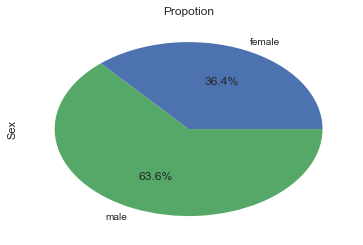

In [52]:
proportion(titanic_data["Sex"])

统计titanic上乘客头等舱、二等舱、三等舱比例  
由图中可以看出比例大概为1:1:2

Pclass
1    184
2    173
3    355
Name: Pclass, dtype: int64


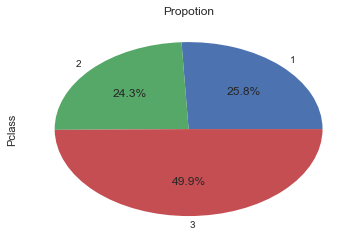

In [53]:
proportion(titanic_data["Pclass"])

统计titanic上乘客登录港口的比例

Embarked
C    130
Q     28
S    554
Name: Embarked, dtype: int64


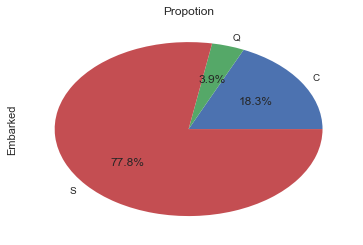

In [54]:
proportion(titanic_data["Embarked"])

## 问题1解答
titanic上的乘客平均年龄29.6岁，最大80岁，最小0.4岁,中位数20岁，标准差14.5岁。  
性别比例(女:男)约为0.6:1  
乘客在头等舱、二等舱、三等舱的分布比例约为1:1:2  
在S港口登陆的乘客最多，占比77.8%

### 对比titanic上生存和未生存的乘客信息

In [98]:
def compare(df,feature):
    '''compare the difference of survived or not
     Input:pandas series
     Output:graph'''
    g=df.groupby([feature,'Survived'])['Survived'].count().unstack()
    g.plot(kind='bar',stacked=True)
    print g
    plt.title("Relationship between survive rate and "+feature)
    plt.xlabel(feature)
    plt.ylabel("Number of Passengers")

In [99]:
#计算整体生存率
survive_rate=1.0*(titanic_data['Survived']==1).sum()/len(titanic_data)
print survive_rate

0.404494382022


整体约有40.4%的人生存下来

### 统计下生存下来的乘客的年龄特点

Survived     0   1
Age_group         
(0, 10]     26  38
(10, 20]    71  44
(20, 30]   146  84
(30, 40]    86  68
(40, 50]    53  33
(50, 60]    25  17
(60, 70]    13   3
(70, 80]     4   1


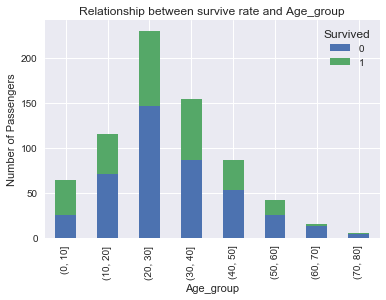

In [100]:
compare(titanic_data,'Age_group')

由上图可以看出儿童的生存概率最大，38/(38+26) 约为59.4%，远高于总体的生存概率40.4%. 通常成人会让儿童先走，这是合理的。

### 统计下生存下来的乘客的性别特点

Survived    0    1
Sex               
female     64  195
male      360   93


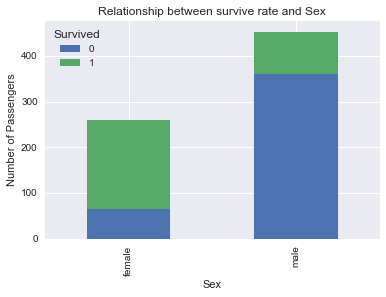

In [102]:
compare(titanic_data,'Sex')

由图中可以看出，女性的生存概率是远大于男性的。女性的生存概率为195/(195+64)，约为75.3%；  
而男性的生存概率为93/(93+360)，约为20.5%

### 统计生存下来的乘客头等舱、二等舱、三等舱比例

Survived    0    1
Pclass            
1          64  120
2          90   83
3         270   85


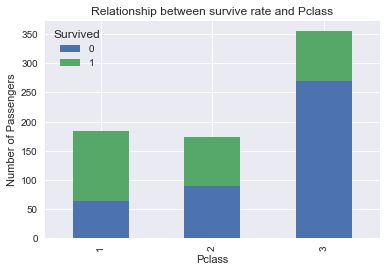

In [103]:
compare(titanic_data,'Pclass')

由图中可以看出,即头等舱的生存概率最高，而三等舱生存概率最低。下面具体计算下三者的生存率  
头等舱生存率：120/(120+64)，约为65.2%  
二等舱生存率：83/(83+90),约为48.0%  
三等舱生存率：85/(85+270),约为23.9%

### 统计生存下来的乘客登录港口比例

Survived    0    1
Embarked          
C          51   79
Q          20    8
S         353  201


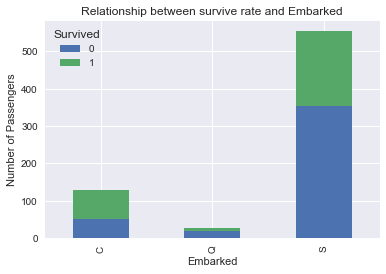

In [104]:
compare(titanic_data,'Embarked')

由图上可看出乘客是否生存和登陆港口关系不大

## 问题2解答
1.儿童(0-10岁)更容易生存下来  
2.女性相比男性更容易生存下来  
3.头等舱的生存概率最大，三等舱最小  
4.是否生存和登录港口关系不大  
由于数据量较小，例如样本中70-80岁年龄段只有5人，生存概率25%并不具有代表意义  
以上结论只是暂时的，未来可能需要进一步改进